# Introduction

## A little bit about us

We are Ben( ) and Lihi( ), students in a data science workshop, approaching the end of our degree.
We are passionate about computer science and want to experience as much as we can in our studies, including data science.   

## project subject - cyberbullying detector and classifier

When we chose the subject for this project we wanted to create something meaningful, and wanted that our project to represent a problem from our everyday lives.
As young individuals with the world of social media all around us, it seemed fitting that our project will be connected to this area.
Therefor we decided that our project should approach a very serious problem we currently have today, cyberbullying and toxicity in social media.  

__What is cyberbullying and why should we track it?__  
Social media in it's basic idea had good intentions, to connect people around the world that would have otherwise never met, to bring us together as a society. 
One of the features that come with social media is anonymity. In utopian world, this would give people the freedom to express themselves to the fullest without the fear of being judged.
Unfortunately there are people that use the online anonymity to bully, curse, and spread hatred online. This phenomenon is called cyberbullying. 
As in face to face bullying, cyberbullying can be a traumatic experience that can psychologically scar the target of the attack, especially young individuals, and in general, ruins the basic goal of social media.

__The data we use in our research can be found in:__  
https://data.mendeley.com/datasets/jf4pzyvnpj/1  
https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification?resource=download&select=cyberbullying_tweets.csv  
https://www.kaggle.com/datasets/muskaanchopra/racismdetection?select=racism-model.csv  

### Problems we encountered

Now, with a general goal in mind, we started to look for specific ideas in the field.
We started by searching Kaggle for interesting datasets that we can work with. In our search, we encountered a dataset (that we use in our project) that is classifying if a tweet is considered to be cyberbullying and if so which kind of cyberbullying : religion, age, gender, ethnicity, or other. We really liked the idea, and decided that this should be the base for our project. 

As we started working on the project and analyzing the data, we realized that this data base might be too small to use by its own:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#kaggle based dataset
cyberbullying_tweets_df = pd.read_csv('./datasets/kaggle/cyberbullying_tweets.csv')
cyberbullying_tweets_df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


number of tweets_total: 47692
number of unique tweets: 46017


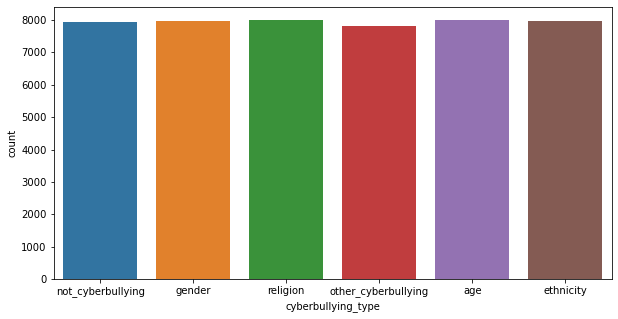

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=cyberbullying_tweets_df, x='cyberbullying_type', ax=ax)
print('number of tweets_total: ' + str(len(cyberbullying_tweets_df)))
print('number of unique tweets: '+ str(len(np.unique(cyberbullying_tweets_df['tweet_text']))))
plt.show()

This dataset is very balanced in terms of the distribution of the results among the catagories, but the total number of unique tweets is not enough for the amount of classes (46017 unique tweets), and therefor we needed to search for more data.
The new data should look similar to our initial dataset so it would fit our main subject. Unfortunately, we couldn't find another dataset that completely fit this narrative. We found datasets that determine if a tweet or post on social media is cyberbullying or not in a binary way or presented a spectrum. We also found datasets that categorize only one or two types of cyberbullying, like racism and sexism, which fit some of our base dataset classes. In addition, we found datasets that categorize different types of cyberbullying that don't fit our initial dataset, like aggression, toxicity and hate speech.

In [4]:
twitter_sexism_parsed_df = pd.read_csv('./datasets/mendeley/twitter_sexism_parsed_dataset.csv')
twitter_racism_parsed_df = pd.read_csv('./datasets/mendeley/twitter_racism_parsed_dataset.csv')
twitter_parsed_df = pd.read_csv('./datasets/mendeley/twitter_parsed_dataset.csv')

#compare sizes
print('size of twitter_racism: ' + str(len(twitter_racism_parsed_df)))
print('size of twitter_sexism: ' + str(len(twitter_sexism_parsed_df)))
print('sizeof twitter_racism + twitter_sexism: ' + str(len(twitter_sexism_parsed_df) + len(twitter_racism_parsed_df)))
print('sizeof twitter_parsed: ' + str(len(twitter_parsed_df)))

#convert row types
twitter_parsed_df = twitter_parsed_df.dropna()
twitter_parsed_df['index'] = twitter_parsed_df['index'].astype('float64')
twitter_parsed_df['id'] = twitter_parsed_df['id'].astype('float64')
twitter_sexism_parsed_df = twitter_sexism_parsed_df.dropna()
twitter_sexism_parsed_df['index'] = twitter_sexism_parsed_df['index'].astype('float64')
twitter_sexism_parsed_df['id'] = twitter_sexism_parsed_df['id'].astype('float64')
twitter_racism_parsed_df = twitter_racism_parsed_df.dropna()

print('-----------------------------------')
print('sizes after dropping rows with na')
print('size of twitter_racism: ' + str(len(twitter_racism_parsed_df)))
print('size of twitter_sexism: ' + str(len(twitter_sexism_parsed_df)))
print('sizeof twitter_parsed: ' + str(len(twitter_parsed_df)))

#print('number of unique data in twitter_racism:' + str(len(np.unique(twitter_racism_parsed_df.dropna()['id']))))

print('-----------------------------------')
print('rows of twitter_racism in twitter_parsed: ' + str(len(twitter_racism_parsed_df.merge(right=twitter_parsed_df, how='inner', on=['index', 'id', 'Text']))))
print('rows of twitter_sexism in twitter_parsed: ' + str(len(twitter_sexism_parsed_df.merge(right=twitter_parsed_df, how='inner', on=['index', 'id', 'Text']))))
print('rows of twitter_parsed in cyberbullying_tweets: ' + str(len(twitter_parsed_df.drop_duplicates(['Text']).merge(right=cyberbullying_tweets_df.drop_duplicates(['tweet_text']), how='left', left_on='Text', right_on='tweet_text'))))

size of twitter_racism: 13471
size of twitter_sexism: 14881
sizeof twitter_racism + twitter_sexism: 28352
sizeof twitter_parsed: 16851
-----------------------------------
sizes after dropping rows with na
size of twitter_racism: 13471
size of twitter_sexism: 14878
sizeof twitter_parsed: 16848
-----------------------------------
rows of twitter_racism in twitter_parsed: 13471
rows of twitter_sexism in twitter_parsed: 14878
rows of twitter_parsed in cyberbullying_tweets: 16848


size of toxicity_parsed: 159686
size of attack_parsed: 115864
size of aggression_parsed: 115864
rows form aggression in toxicity: 80273
rows form aggression in toxicity: 80273


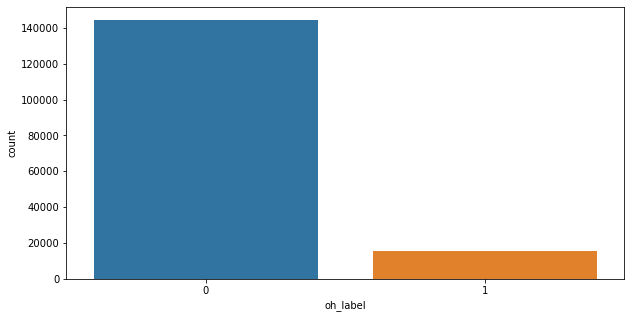

In [5]:
toxicity_parsed_df = pd.read_csv('./datasets/mendeley/toxicity_parsed_dataset.csv')
attack_parsed_df = pd.read_csv('./datasets/mendeley/attack_parsed_dataset.csv')
aggression_parsed_df = pd.read_csv('./datasets/mendeley/aggression_parsed_dataset.csv')

toxicity_parsed_df.head()

print('size of toxicity_parsed: ' + str(len(toxicity_parsed_df)))
print('size of attack_parsed: ' + str(len(attack_parsed_df)))
print('size of aggression_parsed: ' + str(len(aggression_parsed_df)))

temp = attack_parsed_df.merge(right=toxicity_parsed_df, indicator=True, how='left', left_on='Text', right_on='Text').query('_merge=="both"')
print('rows form aggression in toxicity: ' + str(len(temp)))
temp = aggression_parsed_df.merge(right=toxicity_parsed_df, indicator=True, how='left', left_on='Text', right_on='Text').query('_merge=="both"')
print('rows form aggression in toxicity: ' + str(len(temp)))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=toxicity_parsed_df, x='oh_label', ax=ax)
plt.show()


We can see the count per class distribution of most of the datasets here:

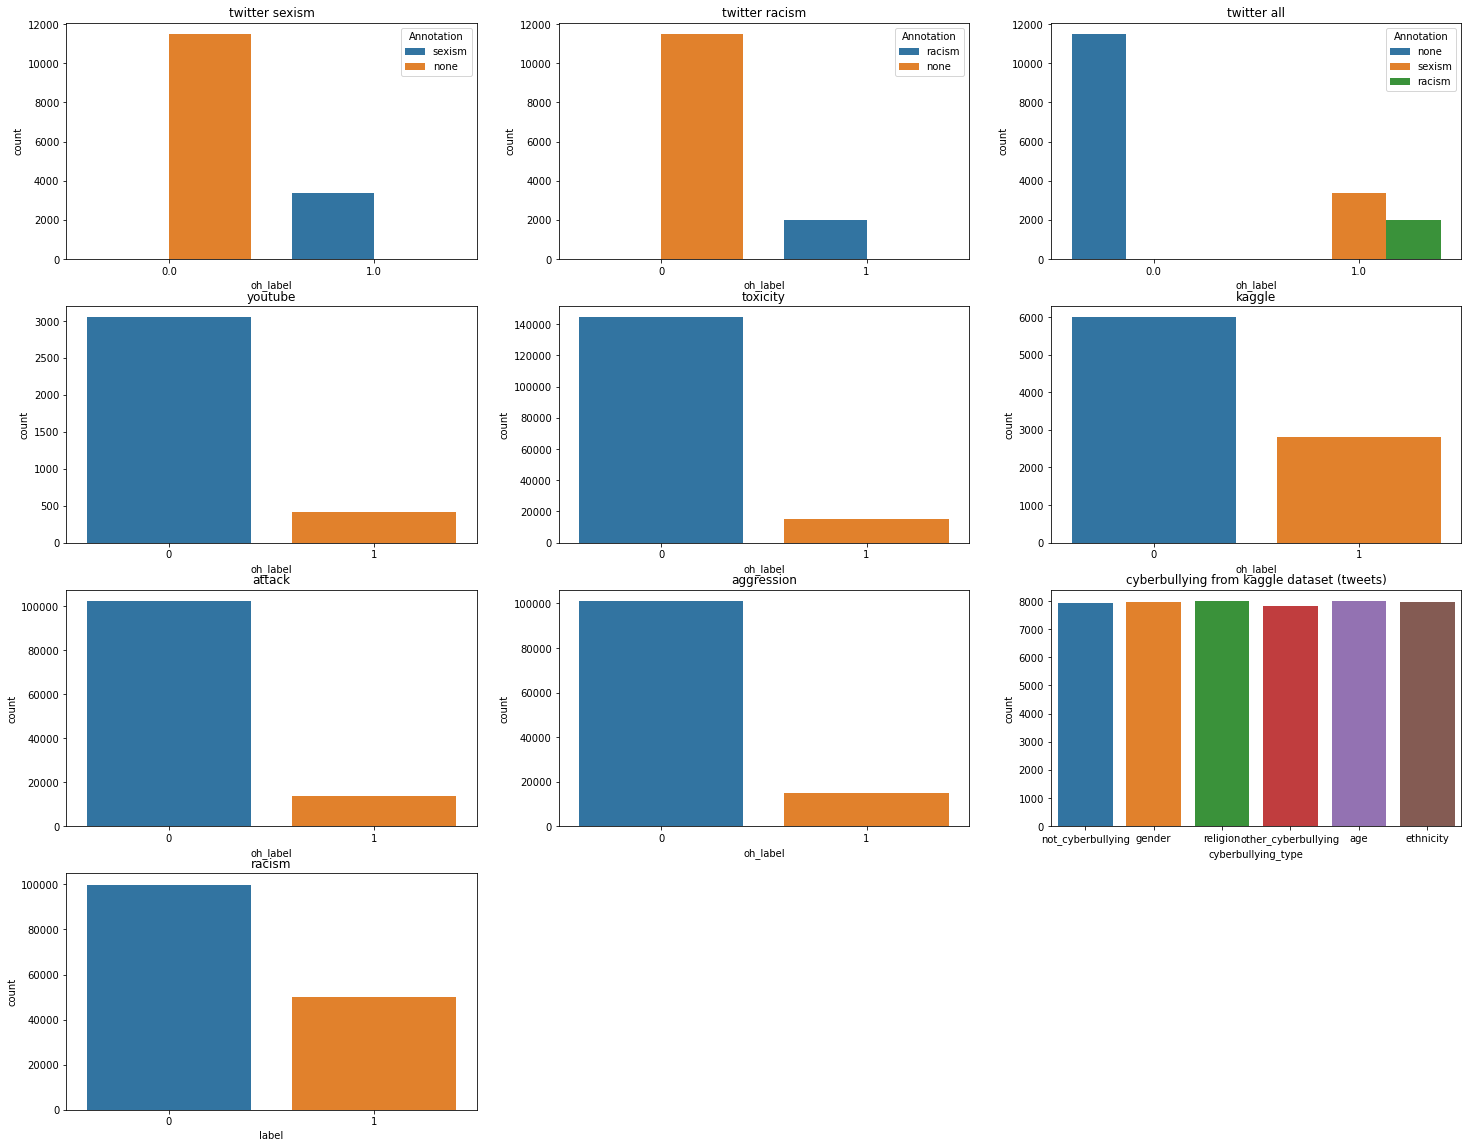

In [6]:
kaggle_parsed_df = pd.read_csv('./datasets/mendeley/kaggle_parsed_dataset.csv')
youtube_parsed_df = pd.read_csv('./datasets/mendeley/youtube_parsed_dataset.csv')
racism_model_df = pd.read_csv('./datasets/kaggle/racism-model.csv')
fig, ax = plt.subplots(4, 3, figsize=(25, 20))
sns.countplot(data=twitter_sexism_parsed_df, x='oh_label', ax=ax[0,0], hue='Annotation').set(title='twitter sexism')
sns.countplot(data=twitter_racism_parsed_df, x='oh_label', ax=ax[0,1], hue='Annotation').set(title='twitter racism')
sns.countplot(data=twitter_parsed_df, x='oh_label', ax=ax[0,2], hue='Annotation').set(title='twitter all')
sns.countplot(data=youtube_parsed_df, x='oh_label', ax=ax[1,0]).set(title='youtube')
sns.countplot(data=toxicity_parsed_df, x='oh_label', ax=ax[1,1]).set(title='toxicity')
sns.countplot(data=kaggle_parsed_df, x='oh_label', ax=ax[1,2]).set(title='kaggle')
sns.countplot(data=attack_parsed_df, x='oh_label', ax=ax[2,0]).set(title='attack')
sns.countplot(data=aggression_parsed_df, x='oh_label', ax=ax[2,1]).set(title='aggression')
sns.countplot(data=cyberbullying_tweets_df, x='cyberbullying_type', ax=ax[2,2]).set(title='cyberbullying from kaggle dataset (tweets)')
sns.countplot(data=racism_model_df, x='label', ax=ax[3,0]).set(title='racism')
ax[3,1].axis('off')
ax[3,2].axis('off')
plt.show()

From these plots and previous code, we understood that we cannot use any of these datasets on their own. The datasets are not balanced, hold only a binary classification, or do not contain enough samples. Our goal was still recognizing more than just if a post is cyberbullying or not, but also the background for the cyberbullying.

#### combining data bases:

A potential solution to our problem was combining some of the datasets, But this raised a few concerns.

For one, how to combine a dataset that only has a binary decision of cyberbullying to a categorized one?
To do that we can only combine them to a binary dataset that answers the question of 'Is it cyberbullying or not?' unless we want to categorize it ourselves which is impossible with these amounts of data.  

Another problem is how to combine datasets that contains only a subset of categories compared to the other.
Our main concern here is that statements of a dataset that have less catagories, might be categorized differently with more catagories. This effects both the non-cyberbullying category and the other catagories. A statement can be both racist and sexist for example, but if we categorize to just racism and not racism we might lose the fact that this statement is also sexist. Another example is if we have a dataset like before that categorize if statements are racist or not, we cannot confidently classify statements that aren't racist. Just because a statement is not racist, does not mean that it should not be classified as another type of cyberbullying.

#### Proposition for a solution:

We propose to separate this problem into two parts:
> 1. A binary decision, if a statement is cyberbullying or not.
> 2. If a statement is cyberbullying, under what category it fits.

For part 1, we have a lot of data and it is easier to combine different datasets to one.
For part 2, we have less data but the question that we ask now is different, the problem here is smaller than before, we don't need to identify if a statement is cyberbullying or not because if a statement is an input to this problem, then it is definitely cyberbullying, so there is no need to look for that information in part 2.

We plan to create 2 classifiers one for each part of this problem:
> 1. To learn if a statement is cyberbullying or not.
> 2. If a statement is cyberbullying, to learn what kind of cyberbullying is it. 

# The binary cyberbulling Classifier

## Setting up the data

From the previous section, we learned that some of the datasets are duplicates of the others. This makes sense, considering this datasets are from studies that reuse data.  
After analyzing them, we decided to combine the following datasets:
> 1. cyberbullying_tweets.csv - the datasets contains texts and their classification, the classification itself contains a sub-type for bullying. The dataset contains texts that appear in the smaller twitter_parsed_dataset.csv dataset (which itself seems to contain the twitter_racism_parsed_dataset.csv and twitter_sexism_parsed_dataset.csv datasets).
> 2. toxicity_parsed_dataset.csv - in the dataset each row contains text, whether they are toxic or not (oh label), and the spectrum of the classification form 0 to 1 (ed label). For our use, we understood 'toxic' data to be cyberbullying and 'not toxic' to not be. The dataset contains texts that appear in the smaller aggression_parsed_dataset.csv and attack_parsed_dataset.csv datasets.
> 3. racism-model.csv - this dataset is for classifying racist values specifically, in which each row is composed of text and label (1 for racism and 0 for not). We will only use the data labeled as racist because we cannot be sure that non racist data is necessarily not cyberbullying.

In [7]:
cyberbullying_tweets_df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [8]:
toxicity_parsed_df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
1,1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0
2,2,Elected or Electoral? JHK,1.0,0.0,0
3,3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0


In [9]:
racism_model_df.head()

,text,label
0,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,1
1,My horses are retarded https://t.co/HYhqc6d5WN,0
2,â€œNIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL...,0
3,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,1
4,â€œEVERYbody calling you Nigger now!â€ https:...,1


Before combining the datasets, we will validate them.

In [10]:
temp = toxicity_parsed_df.merge(right=cyberbullying_tweets_df, indicator=True, how='left', left_on='Text', right_on='tweet_text').query('_merge=="both"')
print('rows shared by toxicity_parsed and cyberbullying_tweets: ' + str(len(temp)))
temp = cyberbullying_tweets_df.merge(right=racism_model_df, indicator=True, how='left', left_on='tweet_text', right_on='text').query('_merge=="both"')
print('rows shared by racism_model and cyberbullying_tweets: ' + str(len(temp)))
temp = racism_model_df.merge(right=toxicity_parsed_df, indicator=True, how='left', left_on='text', right_on='Text').query('_merge=="both"')
print('rows shared by toxicity_parsed and racism_model: ' + str(len(temp)))

rows shared by toxicity_parsed and cyberbullying_tweets: 0
rows shared by racism_model and cyberbullying_tweets: 0
rows shared by toxicity_parsed and racism_model: 0


In [11]:
print('number of rows in toxicity_parsed containing missing values: ' + str(len(toxicity_parsed_df[toxicity_parsed_df.isna().any(axis=1)])))
print('number of rows in cyberbullying_tweets containing missing values: ' + str(len(cyberbullying_tweets_df[cyberbullying_tweets_df.isna().any(axis=1)])))
print('number of rows in racism_model containing missing values: ' + str(len(racism_model_df[racism_model_df.isna().any(axis=1)])))

number of rows in toxicity_parsed containing missing values: 0
number of rows in cyberbullying_tweets containing missing values: 0
number of rows in racism_model containing missing values: 0


In [12]:
duplicates = racism_model_df[racism_model_df.duplicated(subset=['text'], keep=False)]
print('number of row texts that re apart of a duplicate in racism_model: ' + str(len(duplicates)))
duplicates = toxicity_parsed_df[toxicity_parsed_df.duplicated(subset=['Text'], keep=False)]
print('number of row texts that re apart of a duplicate in toxicity_parsed: ' + str(len(duplicates)))
duplicates = cyberbullying_tweets_df[cyberbullying_tweets_df.duplicated(subset=['tweet_text'], keep=False)]
print('number of row texts that re apart of a duplicate in cyberbullying_tweets: ' + str(len(duplicates)))

number of row texts that re apart of a duplicate in racism_model: 0
number of row texts that re apart of a duplicate in toxicity_parsed: 473
number of row texts that re apart of a duplicate in cyberbullying_tweets: 3350


In [13]:
duplicates = toxicity_parsed_df[toxicity_parsed_df.duplicated(subset=['Text'], keep=False)]
print('what group size do the duplicates come in: ' + str(duplicates.value_counts(['Text']).unique()))
duplicates = duplicates.groupby(by=['Text'])['oh_label'].nunique().reset_index(name='unique')
contradictions_toxicity_parsed = duplicates[duplicates['unique'] > 1]
print('text that is apart of both classes:\n' + str(contradictions_toxicity_parsed['Text']))


what group size do the duplicates come in: [34  8  7  6  5  4  3  2]
text that is apart of both classes:
53    Err:509
Name: Text, dtype: object


In [14]:
def combine_it(rows):
    if(len(rows) == 2):
        return pd.Series(( rows.cyberbullying_type.iloc[0], rows.cyberbullying_type.iloc[1]), 
                index=['cyberbullying_type_1','cyberbullying_type_2'])
                
duplicates = cyberbullying_tweets_df[cyberbullying_tweets_df.duplicated(subset=['tweet_text'], keep=False)]
duplicates = duplicates.sort_values(by=['tweet_text', 'cyberbullying_type'])

print('what group size do the duplicates come in: ' + str(duplicates.value_counts(['tweet_text']).unique()))

duplicates = duplicates.groupby(by=['tweet_text']).apply(combine_it).dropna()
duplicates.value_counts(['cyberbullying_type_1','cyberbullying_type_2'], sort=False)


what group size do the duplicates come in: [2]


cyberbullying_type_1  cyberbullying_type_2
ethnicity             ethnicity                  2
                      gender                     1
                      not_cyberbullying          2
                      religion                   4
gender                gender                    25
                      not_cyberbullying         50
                      other_cyberbullying      124
                      religion                   1
not_cyberbullying     not_cyberbullying          8
                      other_cyberbullying     1456
                      religion                   1
religion              religion                   1
dtype: int64

From the previous code section we learned the following:
* There are no missing values in the used datasets.
* There are no crossovers of texts between different datasets.
* There are some repetition in texts in toxicity_parsed and cyberbullying_tweets.

The last revelation made us ponder, 'How should we handle these texts ?'. In the end, we decided to keep these because we assumed the duplicates are from cases where different users generated the same text. Meaning, these are not mistakes but real repetitions of texts. Our belief is that when the duplicates are of the same class, the features should be emphasized by the model, and when they are from different class, the model should cancel them out. Thats why we decided to act this way in our binary case.  
The case of cyberbullying_tweets is more complex because it has multiple classes, but in the end, we decided to keep these as well.

After we finished cleaning the data, we will combine them to one dataset that can be used by our classifier.  
The dataset itself only contains the text and a label. The label is 1 if text is cyberbullying and 0 if not.  
As we mentioned before, in the case of racism_model, only the rows labeled as racist (value 1) will be added.  
Another issue we have found during the writing of this notebook, is that a long string of the letter 'y' crashes some of our libraries at their current version. Because of this, we decided to remove the one instance from the data.

the label distribution is:
0    59.18998
1    40.81002
Name: label, dtype: float64


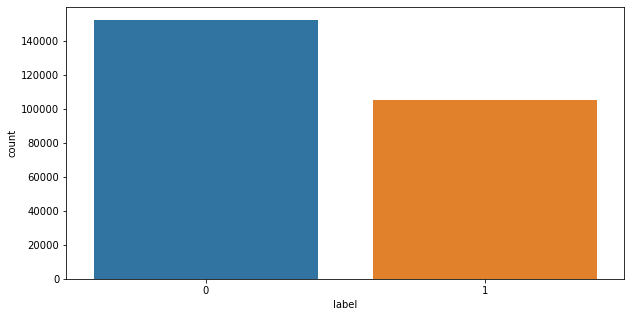

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257253 entries, 0 to 257252
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    257253 non-null  object
 1   label   257253 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ MB


In [15]:
def convert(x):
    if (x == 'not_cyberbullying'):
        return 0
    return 1

data = pd.DataFrame()
data[['text', 'label']] = toxicity_parsed_df.drop([124696])[['Text', 'oh_label']] # Removing the the problematic text
addition_df = pd.DataFrame()
addition_df['text'] = cyberbullying_tweets_df['tweet_text']
addition_df['label'] = cyberbullying_tweets_df['cyberbullying_type'].apply(convert)

data = pd.concat([data, addition_df, racism_model_df[racism_model_df['label'] == 1]]).reset_index(drop=True)
print('the label distribution is:\n' + str(data['label'].value_counts(normalize=True) * 100))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=data, x='label', ax=ax)
plt.show()
data.info()

## Building a classifier

### General preprocessing of the data

In order for the classifiers to work optimally, we decided to preprocess the data. Otherwise, we will be left with lots of unnecessary features in the input. 

For example, our simple models use bag-of-words to classify the data, and without preprocessing it will behave suboptimally.

In [16]:
data['text'].str.split(expand=True).stack().value_counts()

the                        485164
to                         320049
a                          239243
of                         238240
and                        232956
                            ...  
puppets'.)                      1
'gang                           1
puppets',                       1
puppets'                        1
https://t.co/5ir2oCXUSI         1
Length: 724211, dtype: int64

The preprocessing stage will include a normalization of the data.

As part of the normalization, we want  different words that are from the same family to be considered as one. For example, flying and flight could be considered as the same word, and the word 'better' can be considered the same as the word 'good' (depending on if we use a Stemmer or Lemmatizer and the type).

There are 2 ways to achieve this:
- Stemmer
- Lemmatizer

The difference between them is that a Stemmer attempts to reduce the word to get its root form, while a Lemmatizer attempts to reduce the word by finding its base word. A Lemmatizer will use the word type (noun, verb, etc) to different similar root word or find connection of different root words, like better and good.

In [17]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.stem.porter import PorterStemmer

lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word, 'v')) 
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


That is why in the end, we decided use a Lemmatizer with POS tagging (Parts of Speech Tagging) to reduce the word space.

Another issue that we will address before running the Lemmatizer are website links. Website links are mostly unique and don't add much to the data unless we want to look at the domain referenced. We wanted to replace website links to their domain name (in case there is an offensive site that reoccurs in the texts). In the case of IPv4, we were able to implement this, but in the case of IPv6, we replaced it with a placeholder (due time constraints).

After Lemmatizing the data, we removed the stop words. Stop words are words that are important grammatically, but are not useful in a bag-of-words classifier, because they are too common and they don't have any sentiment when taken out of context. Examples are: ',', 'a', 'an', and more.
 
Also, since a lot of the data are tweets we will remove tweeter user names. In addition we added more stages to the preprocessing like de-contract and removing non-alphabet characters.

In [18]:
# Stop words are common words in English that don't tell us anything about the polarity of a comment.
    # Such words include the, that, and a
# Converts a collection of text documents to a matrix of token 

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
from urllib.parse import urlparse

words = stopwords.words("english")

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = [word][0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmanize(text):
  text = pos_tag(word_tokenize(text))
  return  ' '.join([lem.lemmatize(w[0], get_wordnet_pos(w)) for w in text])

def replace_url(text_data, replacement=""):
  """remove_url takes raw text and replaces urls from the text.
    #  https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python/40823105#40823105
    #  """
  return re.sub(r"http\S+", replacement, text_data)
def replace_url_domain(text):
  find_lst = re.findall(r'http\S+',text)
  new = text
  if find_lst:
    domain = (urlparse(find_lst[0]).netloc)
    domain = domain.split(".")
    domain = domain[-2]
    new = re.sub(r'http\S+',domain,text )
  return new

def clean_text(text):
  try:
    text = replace_url_domain(text) # not working for IPv6
  except:
    text = replace_url(text, "sitelink")
  text = lemmanize(text)
  text = ' '.join([i for i in re.sub("@[a-zA-Z0-9_:]* ", " ", text).split() ]).lower() #delete twitter usernames
  text = decontract(text)
  text = ' '.join([i for i in re.sub("'", "", text).split() ]).lower()
  text = ' '.join([i for i in re.sub("[^a-zA-Z]", " ", text).split() if i not in words]).lower()
  return text


data['clean_text'] = data['text'].apply(clean_text)
print(data['clean_text'])

0         one make analogy mathematical term envision di...
1         clarification zundark right check wikipedia bu...
2                                     elected electoral jhk
3         fun entry devotchka coworker korea could tell ...
4         please relate ozone hole increase cancer provi...
                                ...                        
257248                      new video spice black hypocrisy
257249                         damn early nigga creepy shit
257250                          quislaflare good luck nigga
257251                                     nigga big shitty
257252    say nigga rich amp say anger mmph lhhny lhhnyr...
Name: clean_text, Length: 257253, dtype: object


We can see the benefit of cleaning the texts using frequency of words in our dataset in the statements that are labeled as cyberbullying:

In [19]:
data['clean_text'].where(data['label'] == 1).str.split(expand=True).stack().value_counts()

nigga         34814
fuck          20530
nigger        13981
like          13649
get           12099
              ...  
bahah             1
ianpuddick        1
blockem           1
maxmoefoe         1
mmph              1
Length: 89502, dtype: int64

After simplifying the texts, we tokenized the data.  
Tokenizing is the process of breaking every statement into the words, so it will be easier for the classifier to identify certain words that are connected to cyberbullying or not.

In [20]:
from nltk.tokenize import word_tokenize
tokenized_dat = data['clean_text'].apply(word_tokenize)
data['tokens'] = tokenized_dat
print(data['tokens'])


0         [one, make, analogy, mathematical, term, envis...
1         [clarification, zundark, right, check, wikiped...
2                                 [elected, electoral, jhk]
3         [fun, entry, devotchka, coworker, korea, could...
4         [please, relate, ozone, hole, increase, cancer...
                                ...                        
257248                [new, video, spice, black, hypocrisy]
257249                   [damn, early, nigga, creepy, shit]
257250                     [quislaflare, good, luck, nigga]
257251                                 [nigga, big, shitty]
257252    [say, nigga, rich, amp, say, anger, mmph, lhhn...
Name: tokens, Length: 257253, dtype: object


Before training the models we split the data to training and testing. We will be using a 33% split.  

In [21]:
from sklearn.model_selection import train_test_split

TEST_SPLIT = 0.33
train, test = train_test_split(data, test_size=TEST_SPLIT, stratify=data['label'], random_state=0)

### Comparing simple models

We can now attempt to classify our binary data using a vector of word frequencies (bag-of-words).
We will then normalize the vector using Term Frequency–Inverse Document Frequency.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500, tokenizer= lambda x: x, lowercase=False)
# Converts a collection of text documents to a matrix of token counts
# max_features = maximum number of words we'd like to have in our bag of words model
x_train = cv.fit_transform(train['tokens'])
y_train = train['label']
x_test = cv.transform(test['tokens'])
y_test = test['label']


In [23]:
#frequency:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()
x_train = tf_transformer.fit_transform(x_train)
X_test = tf_transformer.transform(x_test)

We will start by introducing a few simple models that are suitable for text classification and will be based on the frequency, and compare their relevant pros and cons for our relevant situation.  
They are: GradientBoosting, MultinominalNB, HistGradientBoosting, RandomForest and LogisticRegression.

__RandomForest__ - _based on decision trees_. Is a collection of decision trees that are trained independently and on different subsets of instances and features. The most voted class by the trees will be selected.  
_Pros:_ 
1. Random Forests generally provide high accuracy and balance the bias-variance trade-off well. Since the model’s principle is to average the results across the multiple decision trees it builds, it averages the variance as well. 
2. Random Forests implicitly perform feature selection and generate uncorrelated decision trees. It does this by choosing a random set of features to build each decision tree. 
3. It can run in parallel to decrease run time.

_Cons:_ 
1. Random Forests can be computationally intensive for large datasets.
2. Random forest is like a black box algorithm, you have very little control over what the model does.
3. If the data contain groups of correlated features of similar relevance for the output, then smaller groups are favored over larger groups.

__GradientBoosting__ - _based on decision trees_. build trees one at a time, where each new tree helps to correct the errors made by the previously trained tree.  
_Pros:_ 
1. Usually more accurate than randomForest because the trees are built to correct each others errors.

_Cons:_ 
1. prone to overfitting especially if the data is noisy. This can be addressed by applying L1 and L2 regularization penalties.
2. harder to tune than RandomForest.
3. It is somewhat slower to train compared to other types of models, because trees need to be trained sequentially.

__HistGradientBoosting__ - _based on decision trees_. It is like GradientBoosting but a decision is made by grouping results from decision trees into histogram. Reducing number of features will increase the speed of the algorithm. It has similar advantages and disadvantages to GradientBoosting, but it is much faster than GradientBoosting for big datasets (n_samples >= 10 000)  

__MultinominalNB__ - a specialized version of _naive bayes_ designed to handle text documents using word counts as it's underlying method of calculating probability. The model calculates the frequency of features for each class while assuming the independence of the conditions of the class.  
_Pros:_ 
1. It is simple and can be used for real-time applications.
2. It is highly scalable and can easily handle large datasets.

_Cons:_ 
1. The prediction accuracy of this algorithm is lower than the other probability models. This might be important when we want to define a cut off for classification.
2. doesn't perform well for sentiment analysis.

__LogisticRegression__ - estimates the _probability_ of an event occurring, such as voted or didn’t vote, or the probability of event success and event failure, based on a given dataset of independent variables.  
_Pros:_ 
1. The algorithm is efficient and has good accuracy for many simple data sets.

_Cons:_ 
1. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
2. it is tough to obtain complex relationships using logistic regression.

__Our estimation:__

These modules are context free, as they are based on the frequency of words in a sentence, and not the meaning derived from the relation of the words to each other. Some of them, like MultinominalNB, assume the words are conditionally independent. Others, like RandomForest and GradientBoosting, do not. Later, we will also use a RNN model that is context based. We believe the later is superior for sentiment analysis, if more complex to implement.


__Metrics:__


We decided to test these module scores before attempting more complicated classifiers like neural network so we can have a base line to compare it to. The metrics we decided to use on the test part are:
- Accuracy - the percentage of correctly labeled samples.
- Precision - the percentage of true positive from the total of tp + fp (false positives). This score signifies how well the classifier does not misclassify 'non cyberbullying' as 'cyberbullying'.
- Recall - the percentage of true negative from the total of tp + fn (false negative). This score signifies how well the classifier classifies 'cyberbullying' as 'cyberbullying'.
- F score - its the weighted harmonic mean of precision and recall using Beta. F1 is equivalent to Beta=1, and it signifies the relative contribution of precision and recall are equal. We will also use a Beta of 0.5 that gives more weight to the precision.

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes is a statistical classification technique based on Bayes Theorem
# common classifier used in sentiment analysis is the Naive Bayes Classifier.
#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier # this is experimental
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [GradientBoostingClassifier(),MultinomialNB(),HistGradientBoostingClassifier(),
               RandomForestClassifier(),LogisticRegression()]

In [25]:
x_train = x_train.toarray()
x_test = x_test.toarray()

for classifier in classifiers:
    t0 = time.time()
    classifier.fit(x_train, y_train)
    t1 = time.time()
    print(str(classifier) + ' learning time in seconds is ' + str(t1 - t0))

GradientBoostingClassifier() learning time in seconds is 1089.4800395965576
MultinomialNB() learning time in seconds is 0.7051136493682861
HistGradientBoostingClassifier() learning time in seconds is 70.3568046092987
RandomForestClassifier() learning time in seconds is 643.8079056739807
LogisticRegression() learning time in seconds is 19.052417755126953


c:\Users\bexpo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


|    | Model                            |   Accuracy |   Precision |   Recall |       F1 |   F Beta=0.5 |
|---:|:---------------------------------|-----------:|------------:|---------:|---------:|-------------:|
|  0 | GradientBoostingClassifier()     |   0.899439 |    0.973451 | 0.774715 | 0.862787 |     0.925945 |
|  1 | MultinomialNB()                  |   0.907143 |    0.88542  | 0.887285 | 0.886352 |     0.885792 |
|  2 | HistGradientBoostingClassifier() |   0.924223 |    0.95468  | 0.8549   | 0.902039 |     0.932903 |
|  3 | RandomForestClassifier()         |   0.883184 |    0.836949 | 0.886448 | 0.860988 |     0.846401 |
|  4 | LogisticRegression()             |   0.920324 |    0.914021 | 0.888324 | 0.90099  |     0.908763 |


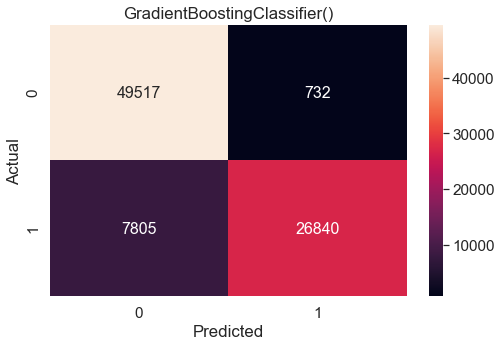

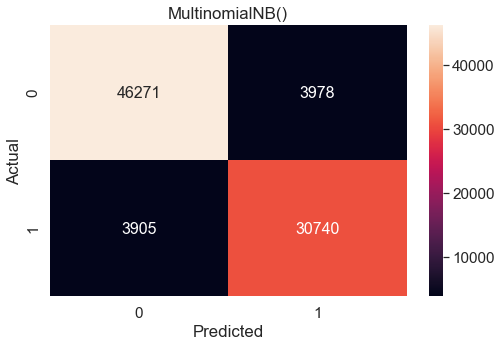

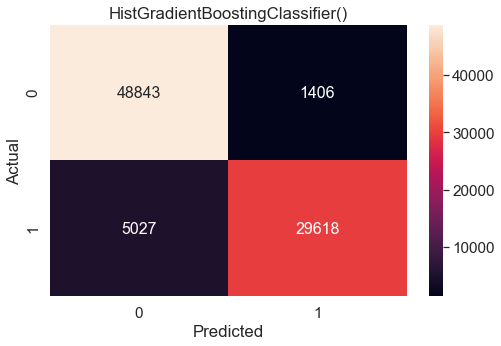

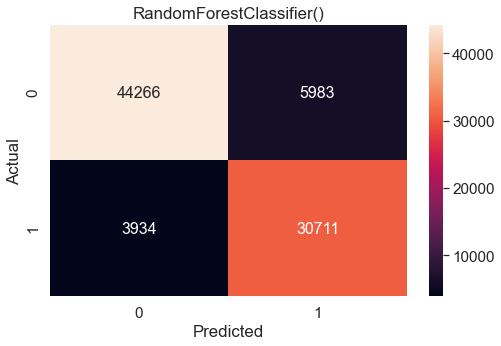

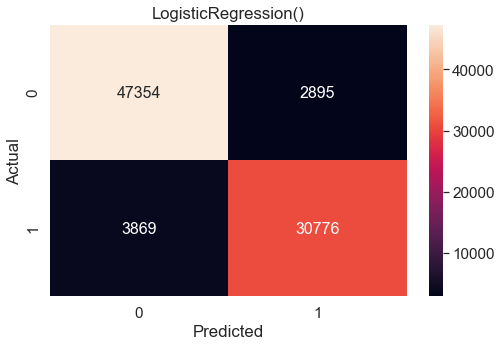

In [26]:
from sklearn.metrics import f1_score, fbeta_score, precision_score, recall_score, confusion_matrix, accuracy_score

BETA = 0.5

def draw_confusion_matrix(correct_labels, predictions, num_labels, title='', normalized=True):
    cmat = confusion_matrix(correct_labels, predictions, labels=range(num_labels))
    if normalized:
        cmat = (cmat.T / cmat.sum(axis=1)).T # normalized
    df_cm = pd.DataFrame(cmat, range(num_labels), range(num_labels))
    plt.figure(figsize=(8,5))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d').set(xlabel='Predicted', ylabel='Actual', title=title)

def calculate_metrics(y_true, y_pred):
    return [accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred),
        f1_score(y_true, y_pred), fbeta_score(y_true, y_pred, beta=BETA)]

tmp = []
for classifier in classifiers:
    y_predicted = classifier.predict(x_test)
    tmp.append([str(classifier)] + calculate_metrics(y_test, y_predicted))
    draw_confusion_matrix(y_test, y_predicted, 2, str(classifier), False)


score_df = pd.DataFrame(tmp, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'F Beta='+str(BETA)])
print(score_df.to_markdown())
plt.show()


As we can see all the classifiers we tried are pretty good but, the best accuracy and F Beta=0.5 is achieved with HistGradientBoostingClassifier. With further tuning of the models' parameters, we might be able to improve the results, but we decided that for now it is a good enough base line.

In some of the classifiers it is possible to see the important features (words) of the model. Evaluating these can help understand how the model works and if it need more preprocessing. It is important to understand how the model works to understand the significance of these features. In our case, we will look at the top features for GradiantBoosting (it's close to the histogram version and has more data), using impurity-based feature importance, and MultinominalNB, using empirical log probability of features given a class.

For the most part the output is as expected while also have some surprising results such as 'school'.

In [27]:
# GradiantBoosting
important_features = [x for _,x in sorted(zip(classifiers[0].feature_importances_, cv.get_feature_names_out()), reverse=True)]
print(str(classifiers[0]) + " top 10 important features using impurity-based feature importance")
print(important_features[:10])

# MultinominalNB
neg_class_prob_sorted = classifiers[1].feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = classifiers[1].feature_log_prob_[1, :].argsort()[::-1]

print("------------------------------------------------------------")
print(str(classifiers[1]) + " top 10 features per class with the highest empirical log probability")
print(np.take(cv.get_feature_names_out(), neg_class_prob_sorted[:10]))
print(np.take(cv.get_feature_names_out(), pos_class_prob_sorted[:10]))

GradientBoostingClassifier() top 10 important features using impurity-based feature importance
['nigga', 'nigger', 'fuck', 'article', 'bully', 'page', 'idiot', 'gay', 'rape', 'cunt']
------------------------------------------------------------
MultinomialNB() top 10 features per class with the highest empirical log probability
['article' 'page' 'wikipedia' 'please' 'would' 'edit' 'talk' 'use' 'make'
 'one']
['nigga' 'fuck' 'nigger' 'like' 'get' 'bully' 'school' 'say' 'u' 'dumb']


### Neural Network based module

In the last section we compared different frequency based modules. We will now attempt to create a more context based analysis using recurrent neural networks. RNN (and LSTM implementation specifically) uses cells that remember the history of the input, in order to determine the output. In our case, it means that LSTM reads all words of a sentence to determine the output. Our model uses tensorflow libraries and is based on their tutorial.

In [28]:
import tensorflow as tf
import tensorflow_addons as tfa

VOCAB_SIZE = 5000  

We noted that the first two model layers handle some of the preprocessing needed for the neural network. Specifically:
- TextVectorization - maps text features to integer sequences, while lowercasing and punctuation stripping. We also found that this layer cannot handle "No-Break Space (NBSP)", so we swapped these instances with space
- Embedding - Turns the positive integers (from the previous layer) into dense vectors of fixed size, the closely associated words having closer vectors.

Because of this and that RNN uses context, we decided to use a different preprocessing method of only replacing domain name and de-contract.  
We also split a validation set from the training set to be used for early stopping of the NN.

In [29]:
def clean_rnn(text):
  text = re.sub(u"\u00A0", ' ', text) # replace NBSP
  try:
    text = replace_url_domain(text) # not working for IPv6
  except:
    text = replace_url(text, "sitelink")
  text = decontract(text)
  return text

# different preprcessing
test['RNN_text'] = test['text'].apply(clean_rnn)
train['RNN_text'] = train['text'].apply(clean_rnn)

In [30]:
VALIDATION_SPLIT = 0.08

train_RNN, validation_RNN = train_test_split(train, test_size=VALIDATION_SPLIT, stratify=train['label'], random_state=0)

In [31]:
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_RNN['RNN_text'].to_numpy())

In addition to the first two layers, the network has a LSTM layer with 64 nodes. The LSTM layer is wrapped with a Bidirectional layer. Meaning, that there are two outputs for each node, one for each direction (one forwards and one backwards). The result of which feeds into a 64 regular dense layer, and then the output layer that has a value in the range of (0, 1) (from the sigmoid). We also added dropout layers to help against overfitting. The layers can also handel variable length input using padding per batch and handling mask.

We ran the training with the objective of getting the best beta score using an early stop with this model.  
In order to encourage precision over recall at training time, we also added extra weight to the loss of the negative class, this is in addition to the known ~60/40 split of the labels.

In [32]:
DROPOUT_RATE = 0.5

def create_rnn():
    model = tf.keras.Sequential([
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=64,
            # Use masking to handle the variable sequence lengths
            mask_zero=True),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=DROPOUT_RATE)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(rate=DROPOUT_RATE),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [33]:
THRESHOLD = 0.5

model = create_rnn()
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy', tfa.metrics.FBetaScore(num_classes=2, beta=BETA, average="micro", threshold=THRESHOLD, name='fbeta_score')]
              )
print('Layers supporting masking: ' + str([layer.supports_masking for layer in model.layers]))
model.summary()

Layers supporting masking: [False, True, True, True, True, True]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                         

In [34]:
%%time
BATCH_SIZE = 100
MAX_EPOCHS = 70
PATIENCE_EPOCHS = 10

history = model.fit(x=train_RNN['RNN_text'].to_numpy(), 
                    y=train_RNN['label'].to_numpy(), 
                    epochs=MAX_EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_data=(validation_RNN['RNN_text'].to_numpy(), validation_RNN['label'].to_numpy()),
                    class_weight = {0: 1.1, 1: 1},
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_fbeta_score', patience=PATIENCE_EPOCHS, restore_best_weights=True, mode="max")
                    )

Epoch 1/70
1586/1586 [==============================] - 229s 137ms/step - loss: 0.3037 - accuracy: 0.8807 - fbeta_score: 0.8850 - val_loss: 0.1764 - val_accuracy: 0.9349 - val_fbeta_score: 0.9322
Epoch 2/70
1586/1586 [==============================] - 205s 129ms/step - loss: 0.1860 - accuracy: 0.9347 - fbeta_score: 0.9337 - val_loss: 0.1599 - val_accuracy: 0.9400 - val_fbeta_score: 0.9376
Epoch 3/70
1586/1586 [==============================] - 204s 129ms/step - loss: 0.1699 - accuracy: 0.9391 - fbeta_score: 0.9371 - val_loss: 0.1573 - val_accuracy: 0.9397 - val_fbeta_score: 0.9310
Epoch 4/70
1586/1586 [==============================] - 205s 129ms/step - loss: 0.1623 - accuracy: 0.9412 - fbeta_score: 0.9378 - val_loss: 0.1520 - val_accuracy: 0.9400 - val_fbeta_score: 0.9341
Epoch 5/70
1586/1586 [==============================] - 215s 135ms/step - loss: 0.1577 - accuracy: 0.9423 - fbeta_score: 0.9385 - val_loss: 0.1515 - val_accuracy: 0.9400 - val_fbeta_score: 0.9338
Epoch 6/70
1586/1586

We plotted the loss, accuracy, and fbeta score for the training and validation sets as a graph of value over epoch.  
From these graphs, we can see that early on the NN becomes overfitted to the training set.

(0.0, 0.9422262668609619)

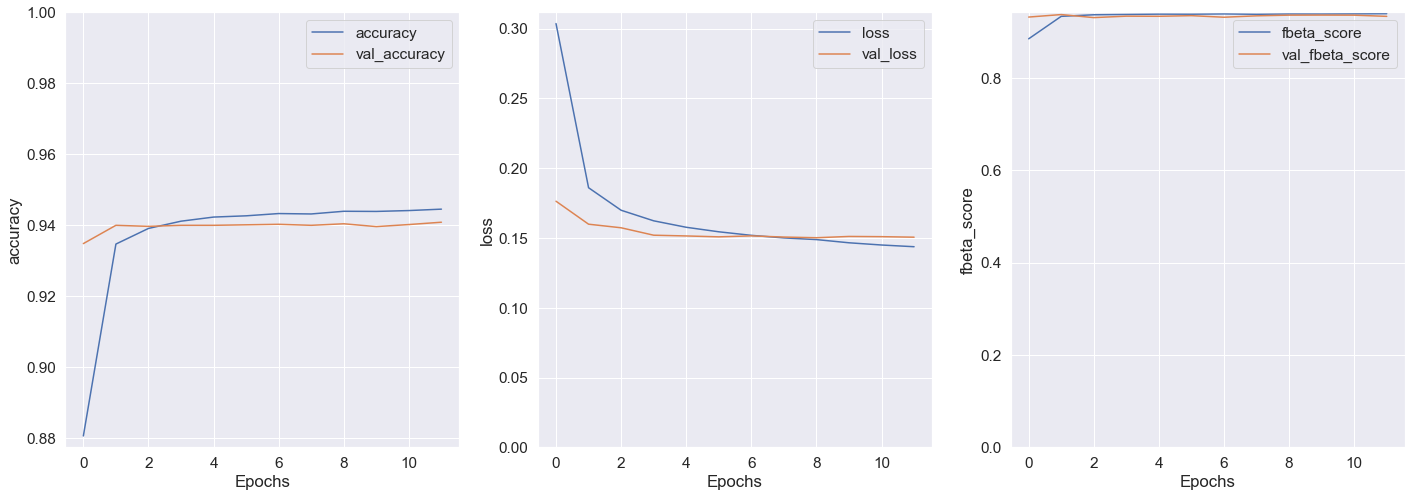

In [35]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 3, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.subplot(1, 3, 3)
plot_graphs(history, 'fbeta_score')
plt.ylim(0, None)

2653/2653 [==============================] - 45s 16ms/step
|    | Model                            |   Accuracy |   Precision |   Recall |       F1 |   F Beta=0.5 |
|---:|:---------------------------------|-----------:|------------:|---------:|---------:|-------------:|
|  0 | GradientBoostingClassifier()     |   0.899439 |    0.973451 | 0.774715 | 0.862787 |     0.925945 |
|  1 | MultinomialNB()                  |   0.907143 |    0.88542  | 0.887285 | 0.886352 |     0.885792 |
|  2 | HistGradientBoostingClassifier() |   0.924223 |    0.95468  | 0.8549   | 0.902039 |     0.932903 |
|  3 | RandomForestClassifier()         |   0.883184 |    0.836949 | 0.886448 | 0.860988 |     0.846401 |
|  4 | LogisticRegression()             |   0.920324 |    0.914021 | 0.888324 | 0.90099  |     0.908763 |
|  0 | RNN                              |   0.936061 |    0.944988 | 0.895454 | 0.919554 |     0.934647 |


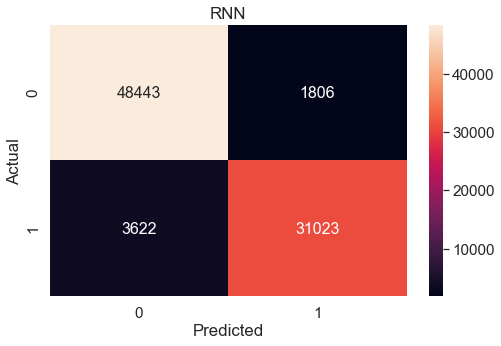

In [36]:
y_predicted = model.predict(test['RNN_text'].to_numpy())
y_test = test['label'].to_numpy()

pred_class = [1 if x >THRESHOLD else 0 for x in y_predicted]

tmp = []
tmp.append([str('RNN')] + calculate_metrics(y_test, pred_class))
draw_confusion_matrix(y_test, pred_class, 2, str('RNN'), False)

score_df = pd.concat([score_df, pd.DataFrame(tmp, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'F Beta=' + str(BETA)])])
print(score_df.to_markdown())
plt.show()


From the score and confusion matrix we can see that the RNN achieves similar performance to our best simple classifiers. We believe that there is room for improvement, for instance, the binary cross entropy loss function is probably not best suited for fscore based evaluation. We can see it from the relative few improvements of the metric while running.  
Version 2 of the RNN swapped the loss to a custom fbeta loss like function (based on [Best loss function for F1-score metric by michal haltuf](https://www.kaggle.com/code/rejpalcz/best-loss-function-for-f1-score-metric/notebook)) that can handle fraction labels (like 0.6) in order to be differential.

These are not the only variations we tested (some we integrated like dropout to handle overfitting). In fact, we believe that this model can be further improved on with changes to architecture that we did not have time to test (or different variations of NN like BERT) or different preprocessing. This flexibility of NN models, is one of their advantages.

In [37]:
import keras.backend as K

def fbeta_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float')
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = (1 + BETA ** 2) * p * r / ((BETA ** 2) * p + r + K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

model = create_rnn()
model.compile(loss = fbeta_loss,
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy', 
                        tfa.metrics.FBetaScore(num_classes=2, beta=BETA, average="micro", threshold=THRESHOLD, name='fbeta_score')]
              )

In [38]:
%%time
history = model.fit(x=train_RNN['RNN_text'].to_numpy(), 
                    y=train_RNN['label'].to_numpy(), 
                    epochs=MAX_EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_data=(validation_RNN['RNN_text'].to_numpy(), validation_RNN['label'].to_numpy()),
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_fbeta_score', patience=PATIENCE_EPOCHS, restore_best_weights=True, mode="max")
                    )

Epoch 1/70
1586/1586 [==============================] - 203s 122ms/step - loss: 0.2022 - accuracy: 0.8191 - fbeta_score: 0.7716 - val_loss: 0.0821 - val_accuracy: 0.9033 - val_fbeta_score: 0.9237
Epoch 2/70
1586/1586 [==============================] - 203s 128ms/step - loss: 0.0791 - accuracy: 0.9090 - fbeta_score: 0.9260 - val_loss: 0.0668 - val_accuracy: 0.9106 - val_fbeta_score: 0.9362
Epoch 3/70
1586/1586 [==============================] - 218s 137ms/step - loss: 0.0662 - accuracy: 0.9181 - fbeta_score: 0.9368 - val_loss: 0.0583 - val_accuracy: 0.9291 - val_fbeta_score: 0.9442
Epoch 4/70
1586/1586 [==============================] - 222s 140ms/step - loss: 0.0626 - accuracy: 0.9192 - fbeta_score: 0.9404 - val_loss: 0.0562 - val_accuracy: 0.9262 - val_fbeta_score: 0.9462
Epoch 5/70
1586/1586 [==============================] - 210s 132ms/step - loss: 0.0563 - accuracy: 0.9265 - fbeta_score: 0.9462 - val_loss: 0.0535 - val_accuracy: 0.9310 - val_fbeta_score: 0.9489
Epoch 6/70
1586/1586

From this version's training graphs we can see that the model trains for more epochs without overfitting. 

(0.0, 0.963654738664627)

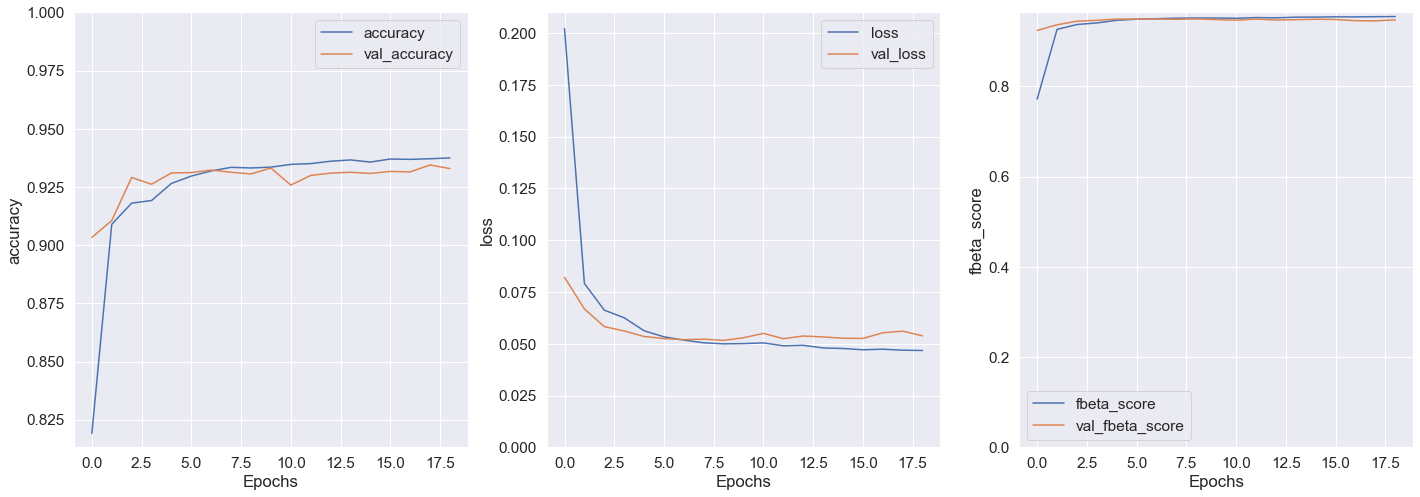

In [39]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 3, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.subplot(1, 3, 3)
plot_graphs(history, 'fbeta_score')
plt.ylim(0, None)

2653/2653 [==============================] - 45s 16ms/step
|    | Model                            |   Accuracy |   Precision |   Recall |       F1 |   F Beta=0.5 |
|---:|:---------------------------------|-----------:|------------:|---------:|---------:|-------------:|
|  0 | GradientBoostingClassifier()     |   0.899439 |    0.973451 | 0.774715 | 0.862787 |     0.925945 |
|  1 | MultinomialNB()                  |   0.907143 |    0.88542  | 0.887285 | 0.886352 |     0.885792 |
|  2 | HistGradientBoostingClassifier() |   0.924223 |    0.95468  | 0.8549   | 0.902039 |     0.932903 |
|  3 | RandomForestClassifier()         |   0.883184 |    0.836949 | 0.886448 | 0.860988 |     0.846401 |
|  4 | LogisticRegression()             |   0.920324 |    0.914021 | 0.888324 | 0.90099  |     0.908763 |
|  0 | RNN                              |   0.936061 |    0.944988 | 0.895454 | 0.919554 |     0.934647 |
|  0 | RNN v2                           |   0.926155 |    0.975692 | 0.839977 | 0.902762 |   

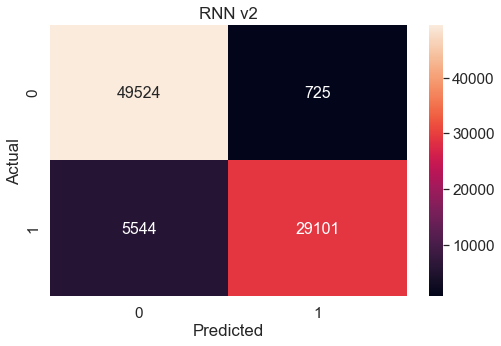

In [40]:
y_predicted = model.predict(test['RNN_text'].to_numpy())
pred_class = [1 if x >THRESHOLD else 0 for x in y_predicted]

tmp = []
tmp.append([str('RNN v2')] + calculate_metrics(y_test, pred_class))
draw_confusion_matrix(y_test, pred_class, 2, str('RNN v2'), False)

score_df = pd.concat([score_df, pd.DataFrame(tmp, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'F Beta=' + str(BETA)])])
print(score_df.to_markdown())
plt.show()


As we hypothesized, it does seem that fscore based loss performs better. We can see it in the score themselves and the learning graph. A side effect of our current beta is the lower recall, this can be addressed by changing the beta or loss function further.

# The categorical cyberbulling Classifier

After creating the binary classifiers that can identify between cyberbullying and not cyberbullying, we moved to create classifier to categorize cyberbullying text to a subtype.

## Setting up the data

For the categorical classification of 'cyberbullying', the dataset will be based on the cyberbullying_tweets_df. We chose this dataset because it is has a lot of categories and they are balanced. Even so, there are a number of problems with the dataset that we attempted to address.

The first one is that even after removing the 'non cyberbullying' samples, there are still samples that have the same text and yet a different classification. Since these samples are few in number (< 170), we wanted to use exclusive classification. So we decided to remove these samples to not create any bias.

In [41]:
categorical_df = cyberbullying_tweets_df[~cyberbullying_tweets_df['cyberbullying_type'].isin(['not_cyberbullying'])]
CYBERBULLYING_CATEGORIES_NUM = len(categorical_df['cyberbullying_type'].unique())
print('There are ' + str(CYBERBULLYING_CATEGORIES_NUM) + ' categiries and they are: ' + str(categorical_df['cyberbullying_type'].unique()))

duplicates = categorical_df[categorical_df.duplicated(subset=['tweet_text'], keep=False)]
duplicates = duplicates.sort_values(by=['tweet_text', 'cyberbullying_type'])

print('what group size do the duplicates come in: ' + str(duplicates.value_counts(['tweet_text']).unique()))

duplicates = duplicates.groupby(by=['tweet_text']).apply(combine_it).dropna().reset_index()
duplicates.value_counts(['cyberbullying_type_1','cyberbullying_type_2'], sort=False)

There are 5 categiries and they are: ['gender' 'religion' 'other_cyberbullying' 'age' 'ethnicity']
what group size do the duplicates come in: [2]


cyberbullying_type_1  cyberbullying_type_2
ethnicity             ethnicity                 2
                      gender                    1
                      religion                  4
gender                gender                   25
                      other_cyberbullying     124
                      religion                  1
religion              religion                  1
dtype: int64

In [42]:
# Removing the conflicts and changing column name
categorical_df = categorical_df[~categorical_df['tweet_text'].isin(duplicates[duplicates['cyberbullying_type_1'] != duplicates['cyberbullying_type_2'] ]['tweet_text'])]
categorical_df.rename(columns={'tweet_text': 'text'}, inplace=True)
# Save space by changing to categorical
categorical_df['cyberbullying_type'] = pd.Categorical(categorical_df['cyberbullying_type'])

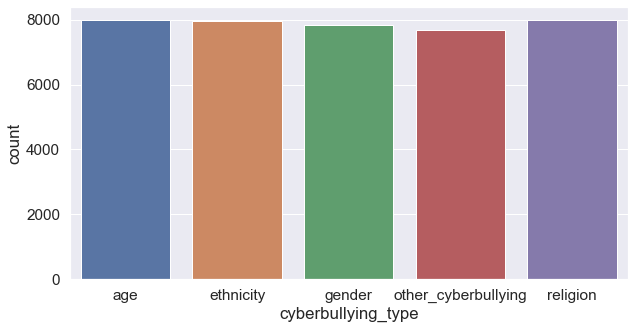

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=categorical_df, x='cyberbullying_type')
plt.show()

In [44]:
TEST_CATEGORICAL_SPLIT = 0.33
VALIDATION_CATEGORICAL_SPLIT = 0.08

#split and create more
train_categorical, test_categorical = train_test_split(categorical_df, test_size=TEST_CATEGORICAL_SPLIT, stratify=categorical_df['cyberbullying_type'], random_state=0)
train_categorical_RNN, validation_categorical_RNN = train_test_split(train_categorical, test_size=VALIDATION_CATEGORICAL_SPLIT, 
                                                                    stratify=train_categorical['cyberbullying_type'], random_state=0)

### Data Augmentation

The second issue is that our dataset is fairly small. We realized that we needed to address this to avoid overfitting.
As we explored the options of dealing with this issue, we decided to use some data augmentation techniques to enlarge our dataset.
We tested a few types of augmentation:
* OCR Augmenter
* Synonym Replacement
* Back translation
* Keyboard Augmenter
* Spelling Augmenter

We will want to augment only our training set, and not the validation (used in RNN) or test data, because we want the test to be as accurately as possible.

In [45]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw

#### Augmantation types: 

__OCR Augmenter__

Change random characters to similar characters.  
For example: instead of fox we will receive f0x.  
_n will determine how many times we will preform this augmentation._ 

In [46]:
text = 'The quick brown fox jumps over the lazy dog .'
aug = nac.OcrAug()
augmented_texts = aug.augment(text, n=5)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Texts:
['The quick 6kown f0x jumps over the lazy dog.', 'The 9uicr brown fox jomp8 over the 1a2y dog.', 'The quick bkuwn fox jumps over the lazy d09.', 'The quick brown fox jomp8 over the 1a2y dog.', 'The quick brown f0x jomp8 over the lazy dog.']


__Keyboard Augmenter__

Change random letters to other letters that their distance in the keyboard is small.  
For example: instead of fox we will receive dox.  
_n will determine how many times we will preform this augmentation._ 

In [47]:
aug = nac.KeyboardAug()
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
['The quick beowg fox jumps ovdF the laA% dog.']


__Spelling Augmenter__

Change random words to the same words but with spelling errors.  
For example: instead of fox we will receive fux.  
_n will determine how many times we will preform this augmentation._ 

In [48]:
aug = naw.SpellingAug()
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Texts:
['The qchick brown fox jumps overt da lazy dog.', 'The qchick browm fox jumps over the lazy dong.', 'The qchick brown fox jumps over el laizy dog.']


__Synonym Augmenter__

Change random words to a synonym of the words.  
For example: instead of quick we will receive speedy.  
_n will determine how many times we will preform this augmentation._ 

In [49]:
aug = naw.SynonymAug(aug_src='wordnet')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
['The quick brown slyboots jumps ended the lazy pawl.']


__Back Translation Augmenter__

Translate to a different language and than translate back to english.  
Usually, the sentence will be a little bit different and therefore can be used as another data in the dataset.

In [50]:
import nlpaug.augmenter.word as naw

text = 'The quick brown fox jumped over the lazy dog'
back_translation_aug = naw.BackTranslationAug(
    from_model_name='Helsinki-NLP/opus-mt-en-ru',
    to_model_name='Helsinki-NLP/opus-mt-ru-en')
back_translation_aug.augment(text)

['A fast brown fox jumped on a lazy dog.']

#### Enlarging the training set

After some debating we decided that we will use Synonym Augmentation as our main augmentation and then we will add Keyboard Augmentation and Spelling Augmentation for our data.
As for the other types of augmentations:
* OCR augmentation conflicts with our cleaning preprocessing (like fox -> f0x).
* Unfortunately, we didn't have time to incorporate back translation in our augmentations.

We believe this stage can be further improved upon with more time.

In [51]:
def get_augmentation(data, aug, n=5):
    aug_dat = pd.DataFrame(columns=['text', 'cyberbullying_type'])
    for index, row in data.iterrows():
        augmented_texts = aug.augment(row['text'], n)
        if len(augmented_texts) > 0:
            aug_dat = pd.concat([aug_dat, pd.DataFrame({'text': augmented_texts, 'cyberbullying_type': [row['cyberbullying_type'] for i in range(len(augmented_texts))]})])
    return aug_dat

In [52]:
syn_aug = naw.SynonymAug(aug_src='wordnet')

validation_categorical_RNN_aug = pd.concat([validation_categorical_RNN, get_augmentation(validation_categorical_RNN, syn_aug, n=3)])
train_categorical_RNN_aug = pd.concat([train_categorical_RNN, get_augmentation(train_categorical_RNN, syn_aug, n=3)])


In [53]:
key_aug = nac.KeyboardAug()
spl_aug = naw.SpellingAug()

validation_categorical_RNN_aug = pd.concat([validation_categorical_RNN_aug, 
                                            get_augmentation(validation_categorical_RNN_aug, key_aug, n=1), 
                                            get_augmentation(validation_categorical_RNN_aug, spl_aug, n=1)])

train_categorical_RNN_aug = pd.concat([train_categorical_RNN_aug, 
                                        get_augmentation(train_categorical_RNN_aug, key_aug, n=1), 
                                        get_augmentation(train_categorical_RNN_aug, spl_aug, n=1)])

train_categorical_aug = pd.concat([train_categorical_RNN_aug, validation_categorical_RNN_aug])


In [54]:
print('data_merged size: ' + str(len(train_categorical_aug)))
print('original data size: ' + str(len(train_categorical)))

data_merged size: 317472
original data size: 26456


Another part of the preprocessing is the changing of the category to a number label. This representation are important for certain algorithms.

In [55]:
map = {'age': 0,
    'ethnicity': 1,
    'gender': 2,
    'religion': 3,
    'other_cyberbullying': 4
    }
    
test_categorical['label'] = test_categorical['cyberbullying_type'].map(map)
train_categorical_aug['label'] = train_categorical_aug['cyberbullying_type'].map(map)
train_categorical_RNN_aug['label'] = train_categorical_RNN_aug['cyberbullying_type'].map(map)
validation_categorical_RNN['label'] = validation_categorical_RNN['cyberbullying_type'].map(map)

## Simple models

In consideration of the advantages, disadvantages and results that we previously explored with these models, we estimate that RandomForest, GradientBoosting (and by extension HistGradientBoosting) will give us the best results. The documentation recommends not to use GradientBoosting in a multi class scenario because of the heavy computation required. We experienced similar issues, so we decided to remove GradientBoosting and leave only the histogram version.

In the following section we tested the multi class classifiers with the augmented training set.

The metrics that we used are: Precision, Recall, F1 that are configured to use macro average (calculate the metric for each label, and find their unweighted mean). We will also use the Accuracy metric which we set as the most important metric for these tests. 

In [56]:
train_categorical_aug['tokens'] = train_categorical_aug['text'].apply(clean_text).apply(word_tokenize)
test_categorical['tokens'] = test_categorical['text'].apply(clean_text).apply(word_tokenize)

In [57]:
cv = CountVectorizer(max_features = 1500, tokenizer= lambda x: x, lowercase=False)
# Converts a collection of text documents to a matrix of token counts
# max_features = maximum number of words we'd like to have in our bag of words model
x_train = cv.fit_transform(train_categorical_aug['tokens'])
y_train = train_categorical_aug['label']
x_test = cv.transform(test_categorical['tokens'])
y_test = test_categorical['label']

In [58]:
#frequency:
tf_transformer = TfidfTransformer()
x_train = tf_transformer.fit_transform(x_train)
X_test = tf_transformer.transform(x_test)

In [59]:
classifiers = [MultinomialNB(),HistGradientBoostingClassifier(),
               RandomForestClassifier(),LogisticRegression()]

In [60]:
x_train = x_train.toarray()
x_test = x_test.toarray()

for classifier in classifiers:
    t0 = time.time()
    classifier.fit(x_train, y_train)
    t1 = time.time()
    print(str(classifier) + ' learning time in seconds is ' + str(t1 - t0))

MultinomialNB() learning time in seconds is 1.1359620094299316
HistGradientBoostingClassifier() learning time in seconds is 439.6292018890381
RandomForestClassifier() learning time in seconds is 1334.7022387981415
LogisticRegression() learning time in seconds is 62.962653398513794


c:\Users\bexpo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


|    | Model                            |   Accuracy |   Precision |   Recall |       F1 |
|---:|:---------------------------------|-----------:|------------:|---------:|---------:|
|  0 | MultinomialNB()                  |   0.830404 |    0.839551 | 0.827224 | 0.809011 |
|  1 | HistGradientBoostingClassifier() |   0.939222 |    0.938398 | 0.938532 | 0.938331 |
|  2 | RandomForestClassifier()         |   0.917888 |    0.915591 | 0.916693 | 0.915448 |
|  3 | LogisticRegression()             |   0.855268 |    0.861427 | 0.852306 | 0.835727 |


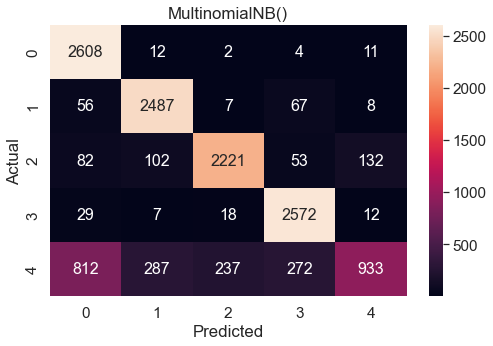

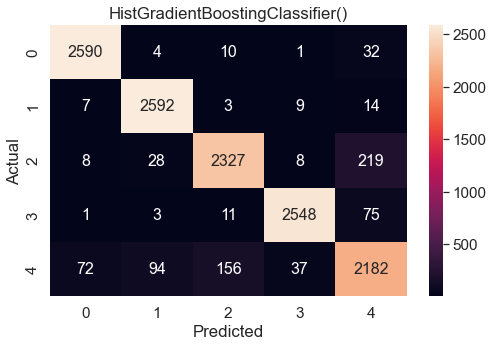

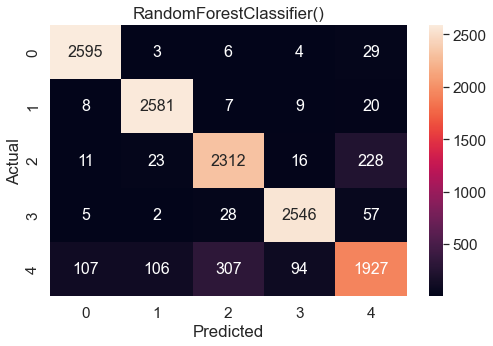

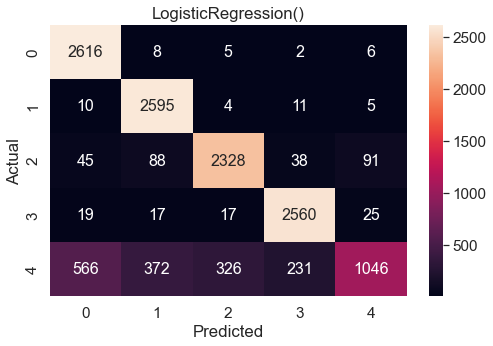

In [61]:
def calculate_categorical_metrics(y_true, y_pred):
    return [accuracy_score(y_true, y_pred), precision_score(y_true, y_pred, average='macro'), 
            recall_score(y_true, y_pred, average='macro'), f1_score(y_true, y_pred, average='macro')]

tmp = []
for classifier in classifiers:
    y_predicted = classifier.predict(x_test)
    tmp.append([str(classifier)] + calculate_categorical_metrics(y_test, y_predicted))
    draw_confusion_matrix(y_test, y_predicted, CYBERBULLYING_CATEGORIES_NUM, str(classifier), False)


categorical_aug_score_df = pd.DataFrame(tmp, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print(categorical_aug_score_df.to_markdown())
plt.show()

It seems that from these scores and confusion metrics, this HistGradientBoosting is the best model.  
We had divided expectations for the results. For example Ben was surprised the MultinominalNB model behaved poorly compared to the other models. Ben theorized that the problem of the subtype is less context base than the binary problem and therefor will perform better. On the other hand, Lihi thought that the subtype problem still have issues of sentiment and therefor assumed that the model will not behave well. 

Another observation, is that the models found it difficult to correctly classify the 'other_cyberbullying' label. This result was somewhat expected by us because theorized that the 'other_cyberbullying' group has no coalescing features. In the section bellow we can see that for example the frequency the word 'jehad' (if spelled differently 'jihad') is high in both 'religion' and 'other_cyberbullying' labels.

In [62]:
# RandomForest
important_features = [x for _,x in sorted(zip(classifiers[2].feature_importances_, cv.get_feature_names_out()), reverse=True)]
print(str(classifiers[2]) + " top 10 important features using impurity-based feature importance")
print(important_features[:10])

# MultinominalNB
print("------------------------------------------------------------")
print(str(classifiers[0]) + " top 10 features per class with the highest empirical log probability")
for i in range(CYBERBULLYING_CATEGORIES_NUM):
    print(np.take(cv.get_feature_names_out(), classifiers[0].feature_log_prob_[i, :].argsort()[::-1]))

RandomForestClassifier() top 10 important features using impurity-based feature importance
['school', 'bully', 'dumb', 'nigger', 'high', 'joke', 'gay', 'rape', 'muslim', 'fuck']
------------------------------------------------------------
MultinomialNB() top 10 features per class with the highest empirical log probability
['bully' 'school' 'high' ... 'prophet' 'isis' 'freebsdgirl']
['dumb' 'fuck' 'nigger' ... 'freebsdgirl' 'mosque' 'kashmir']
['joke' 'gay' 'rape' ... 'jihad' 'israel' 'hindoo']
['muslim' 'idiot' 'christian' ... 'ballyrag' 'swagger' 'blameonenotall']
['rt' 'co' 'sitelink' ... 'jehad' 'allah' 'mosque']


After completing the training and testing of the simple models on the augmented data, we wanted to test if the augmentation helped generalize the models or was just determinantal to their performance.

In [63]:
train_categorical['label'] = train_categorical['cyberbullying_type'].map(map)
train_categorical['tokens'] = train_categorical['text'].apply(clean_text).apply(word_tokenize)

In [64]:
cv = CountVectorizer(max_features = 1500, tokenizer= lambda x: x, lowercase=False)
# Converts a collection of text documents to a matrix of token counts
# max_features = maximum number of words we'd like to have in our bag of words model
x_train = cv.fit_transform(train_categorical['tokens'])
y_train = train_categorical['label']
x_test = cv.transform(test_categorical['tokens'])
y_test = test_categorical['label']

In [65]:
#frequency:
tf_transformer = TfidfTransformer()
x_train = tf_transformer.fit_transform(x_train)
X_test = tf_transformer.transform(x_test)

In [66]:
classifiers = [MultinomialNB(),HistGradientBoostingClassifier(),
               RandomForestClassifier(),LogisticRegression()]

In [67]:
x_train = x_train.toarray()
x_test = x_test.toarray()

for classifier in classifiers:
    t0 = time.time()
    classifier.fit(x_train, y_train)
    t1 = time.time()
    print(str(classifier) + ' learning time in seconds is ' + str(t1 - t0))

MultinomialNB() learning time in seconds is 0.09446978569030762
HistGradientBoostingClassifier() learning time in seconds is 111.28333115577698
RandomForestClassifier() learning time in seconds is 42.40968108177185
LogisticRegression() learning time in seconds is 5.8294079303741455


c:\Users\bexpo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


|    | Model                            |   Accuracy |   Precision |   Recall |       F1 |
|---:|:---------------------------------|-----------:|------------:|---------:|---------:|
|  0 | MultinomialNB()                  |   0.869619 |    0.869886 | 0.867575 | 0.862316 |
|  1 | HistGradientBoostingClassifier() |   0.947433 |    0.948618 | 0.947097 | 0.947439 |
|  2 | RandomForestClassifier()         |   0.935462 |    0.935847 | 0.934827 | 0.935239 |
|  3 | LogisticRegression()             |   0.892487 |    0.893359 | 0.890463 | 0.884294 |


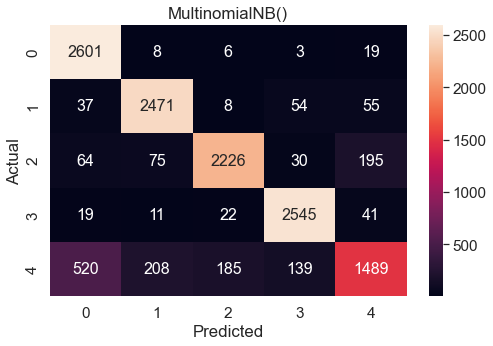

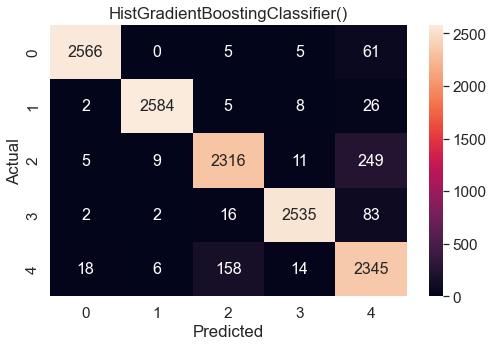

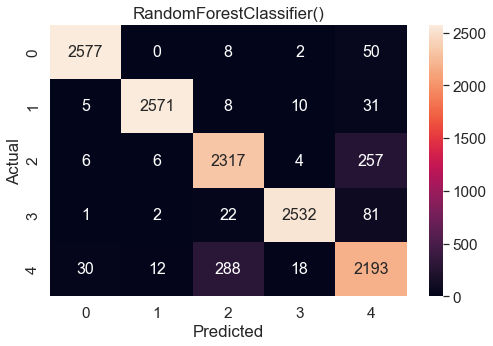

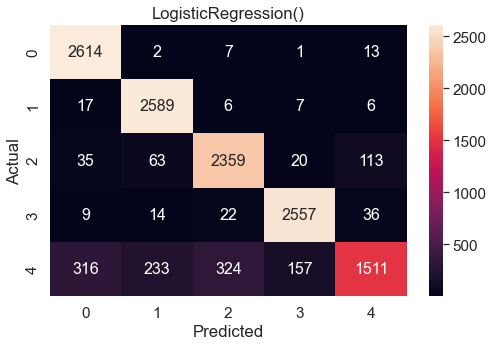

In [68]:
tmp = []
for classifier in classifiers:
    y_predicted = classifier.predict(x_test)
    tmp.append([str(classifier)] + calculate_categorical_metrics(y_test, y_predicted))
    draw_confusion_matrix(y_test, y_predicted, CYBERBULLYING_CATEGORIES_NUM, str(classifier), False)


categorical_score_df = pd.DataFrame(tmp, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print(categorical_score_df.to_markdown())
plt.show()

From the results we saw that models that trained on the original training data had a higher accuracy value on the test set, than the augmented trained classifiers.
Again, we had divided assumptions. Ben thought that reason of this discrepancy is the augmentation process on the data was flawed. He believed that the process created sentences with different labels from the original or added unnecessary noise (although we didn't use cross validation to eliminate variants in the validation split). Lihi thought the augmentation won't change the data drastically and will add value in training the data. 

From the confusion metrics, it seems that the issue in distinguishing 'other_cyberbullying' from the rest (especially religion) persists. 

In [69]:
# RandomForest
important_features = [x for _,x in sorted(zip(classifiers[2].feature_importances_, cv.get_feature_names_out()), reverse=True)]
print(str(classifiers[2]) + " top 10 important features using impurity-based feature importance")
print(important_features[:10])

# MultinominalNB
print("------------------------------------------------------------")
print(str(classifiers[0]) + " top 10 features per class with the highest empirical log probability")
for i in range(CYBERBULLYING_CATEGORIES_NUM):
    print(np.take(cv.get_feature_names_out(), classifiers[0].feature_log_prob_[i, :].argsort()[::-1]))

RandomForestClassifier() top 10 important features using impurity-based feature importance
['school', 'bully', 'dumb', 'nigger', 'high', 'rape', 'gay', 'fuck', 'joke', 'idiot']
------------------------------------------------------------
MultinomialNB() top 10 features per class with the highest empirical log probability
['school' 'bully' 'high' ... 'hadith' 'hai' 'wadhwa']
['fuck' 'nigger' 'dumb' ... 'masculinity' 'maxblumenthal' 'cult']
['joke' 'rape' 'gay' ... 'brotherhood' 'jihadis' 'islamophobia']
['muslim' 'idiot' 'muslims' ... 'mileycyrus' 'car' 'ima']
['rt' 'bully' 'get' ... 'miley' 'declare' 'muhammad']


## RNN

After testing the simple models we move to test a RNN model on both the augmented and the original data.  
We will note that the validation data was not augmented in any of the tests.
  
For the RNN we will use the same preprocessing as the last RNN section.  
This time, we will use a loss function of categorical cross entropy because of our use of 'one hot' (a vector of classes where all values are zero except for one, the position of which specifies the class) labels and a 'softmax' activation on the output (this will ensures the probabilities are summed to 1). The network configures the metrics and early stop to max 'categorical accuracy'.  
This version of RNN doesn't have the dropout layer and we will note that adding it might improve this model further. 

Before the training, we converted the label to a 'one-hot' representation of the label. This representation is needed to match our NN and loss function.

In [70]:
y_test = tf.keras.utils.to_categorical(test_categorical['label'].values, num_classes=CYBERBULLYING_CATEGORIES_NUM)
y_train_RNN = tf.keras.utils.to_categorical(train_categorical_RNN_aug['label'].values, num_classes=CYBERBULLYING_CATEGORIES_NUM)
y_validation_RNN = tf.keras.utils.to_categorical(validation_categorical_RNN['label'].values, num_classes=CYBERBULLYING_CATEGORIES_NUM)

In [71]:
train_categorical_RNN_aug['RNN_text'] = train_categorical_RNN_aug['text'].apply(clean_rnn)
validation_categorical_RNN['RNN_text'] = validation_categorical_RNN['text'].apply(clean_rnn)
test_categorical['RNN_text'] = test_categorical['text'].apply(clean_rnn)

In [72]:
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_categorical_RNN_aug['RNN_text'].to_numpy())

In [73]:
def create_rnn():
    model = tf.keras.Sequential([
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=64,
            # Use masking to handle the variable sequence lengths
            mask_zero=True),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(CYBERBULLYING_CATEGORIES_NUM, activation='softmax')
    ])
    model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(1e-4),
                metrics = [tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
                )
    return model

model = create_rnn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 394,629
Trainable params: 394,629
Non-tr

In [74]:
%%time
history = model.fit(x=train_categorical_RNN_aug['RNN_text'].to_numpy(), 
                    y=y_train_RNN, 
                    epochs=70, 
                    batch_size=100,
                    validation_data=(validation_categorical_RNN['RNN_text'].to_numpy(), y_validation_RNN),
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, mode="max")
                    )

Epoch 1/70
2921/2921 [==============================] - 126s 38ms/step - loss: 0.5348 - accuracy: 0.8180 - val_loss: 0.2123 - val_accuracy: 0.9376
Epoch 2/70
2921/2921 [==============================] - 107s 35ms/step - loss: 0.2518 - accuracy: 0.9156 - val_loss: 0.1756 - val_accuracy: 0.9438
Epoch 3/70
2921/2921 [==============================] - 97s 33ms/step - loss: 0.2114 - accuracy: 0.9274 - val_loss: 0.1668 - val_accuracy: 0.9424
Epoch 4/70
2921/2921 [==============================] - 99s 34ms/step - loss: 0.1883 - accuracy: 0.9339 - val_loss: 0.1653 - val_accuracy: 0.9405
Epoch 5/70
2921/2921 [==============================] - 97s 33ms/step - loss: 0.1733 - accuracy: 0.9391 - val_loss: 0.1634 - val_accuracy: 0.9438
Epoch 6/70
2921/2921 [==============================] - 97s 33ms/step - loss: 0.1631 - accuracy: 0.9420 - val_loss: 0.1654 - val_accuracy: 0.9443
Epoch 7/70
2921/2921 [==============================] - 102s 35ms/step - loss: 0.1544 - accuracy: 0.9453 - val_loss: 0.172

From the graph we can see that the test becomes overfitted quickly.

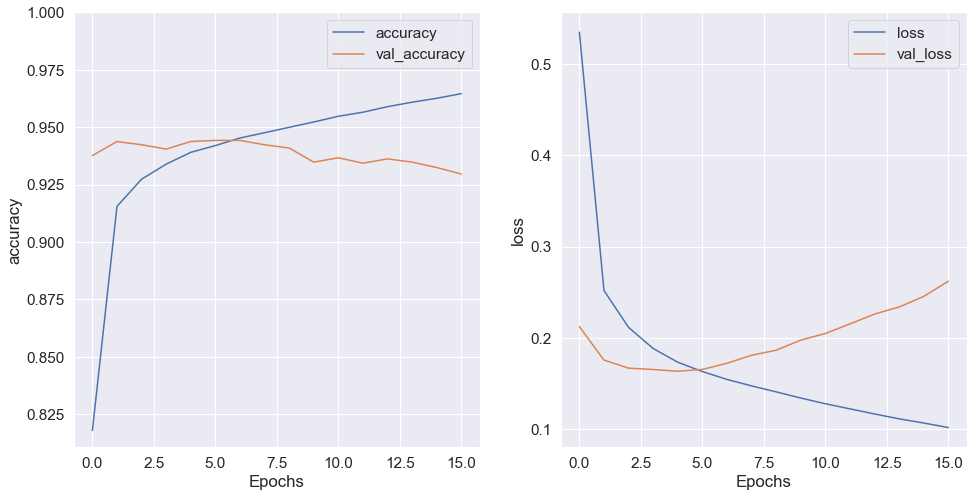

In [75]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

408/408 [==============================] - 6s 7ms/step
|    | Model                            |   Accuracy |   Precision |   Recall |       F1 |
|---:|:---------------------------------|-----------:|------------:|---------:|---------:|
|  0 | MultinomialNB()                  |   0.830404 |    0.839551 | 0.827224 | 0.809011 |
|  1 | HistGradientBoostingClassifier() |   0.939222 |    0.938398 | 0.938532 | 0.938331 |
|  2 | RandomForestClassifier()         |   0.917888 |    0.915591 | 0.916693 | 0.915448 |
|  3 | LogisticRegression()             |   0.855268 |    0.861427 | 0.852306 | 0.835727 |
|  0 | RNN                              |   0.94375  |    0.943294 | 0.943221 | 0.943179 |


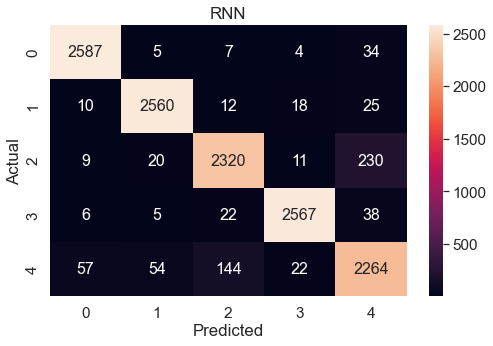

In [76]:
# Predict
y_predicted = model.predict(test_categorical['RNN_text'].to_numpy())
y_test = test_categorical['label'].to_numpy()

# Convert to labels
pred_class = [np.argmax(pred) for pred in y_predicted]

# Run metrics
tmp = []
tmp.append([str('RNN')] + calculate_categorical_metrics(y_test, pred_class))
draw_confusion_matrix(y_test, pred_class, CYBERBULLYING_CATEGORIES_NUM, str('RNN'), False)

categorical_aug_score_df = pd.concat([categorical_aug_score_df, pd.DataFrame(tmp, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])])
print(categorical_aug_score_df.to_markdown())
plt.show()


From the results and the confusion metric we can see that the performance of this RNN (without dropout) is similar, in it's metrics, to the best performing model (HistGradientBoosting).
Another interesting observation is that, like HistGradientBoosting, the RNN classifies 'other_cyberbullying' better than most.

Next, we tested the performance of the unaugmented training set.

In [77]:
train_categorical_RNN['label'] = train_categorical_RNN['cyberbullying_type'].map(map)
y_train_RNN = tf.keras.utils.to_categorical(train_categorical_RNN['label'].values, num_classes=CYBERBULLYING_CATEGORIES_NUM)
train_categorical_RNN['RNN_text'] = train_categorical_RNN['text'].apply(clean_rnn)

In [78]:
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_categorical_RNN['RNN_text'].to_numpy())

In [79]:
model = create_rnn()

In [80]:
%%time
history = model.fit(x=train_categorical_RNN['RNN_text'].to_numpy(), 
                    y=y_train_RNN, 
                    epochs=70, 
                    batch_size=100,
                    validation_data=(validation_categorical_RNN['RNN_text'].to_numpy(), y_validation_RNN),
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, mode="max")
                    )

Epoch 1/70
244/244 [==============================] - 19s 44ms/step - loss: 1.4463 - accuracy: 0.4361 - val_loss: 1.0512 - val_accuracy: 0.6207
Epoch 2/70
244/244 [==============================] - 8s 33ms/step - loss: 0.8009 - accuracy: 0.7529 - val_loss: 0.5977 - val_accuracy: 0.8351
Epoch 3/70
244/244 [==============================] - 8s 32ms/step - loss: 0.4673 - accuracy: 0.8682 - val_loss: 0.4028 - val_accuracy: 0.8791
Epoch 4/70
244/244 [==============================] - 10s 41ms/step - loss: 0.3188 - accuracy: 0.9084 - val_loss: 0.3074 - val_accuracy: 0.9103
Epoch 5/70
244/244 [==============================] - 8s 32ms/step - loss: 0.2471 - accuracy: 0.9281 - val_loss: 0.2860 - val_accuracy: 0.9150
Epoch 6/70
244/244 [==============================] - 8s 32ms/step - loss: 0.2045 - accuracy: 0.9414 - val_loss: 0.2452 - val_accuracy: 0.9244
Epoch 7/70
244/244 [==============================] - 8s 32ms/step - loss: 0.1778 - accuracy: 0.9492 - val_loss: 0.2346 - val_accuracy: 0.92

As presented in the graph the training took more epochs than before.

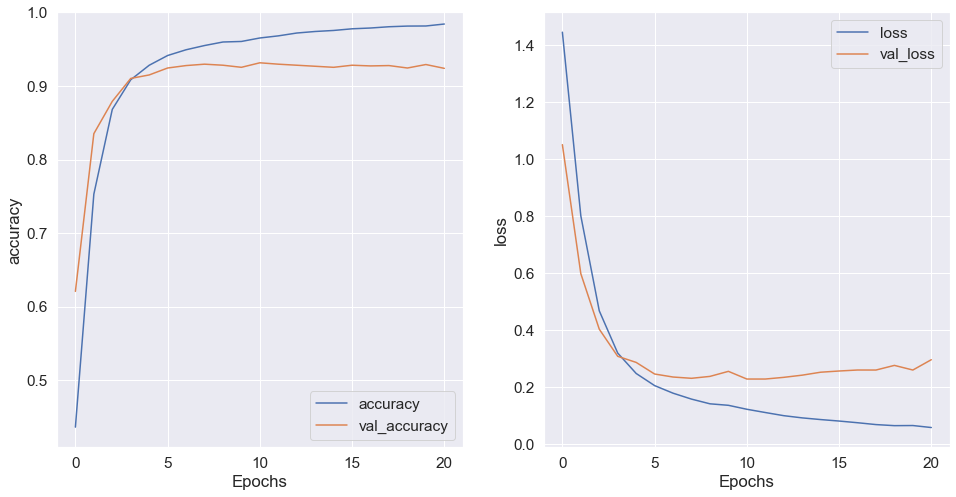

In [81]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

408/408 [==============================] - 7s 7ms/step
non augmented score
|    | Model                            |   Accuracy |   Precision |   Recall |       F1 |
|---:|:---------------------------------|-----------:|------------:|---------:|---------:|
|  0 | MultinomialNB()                  |   0.869619 |    0.869886 | 0.867575 | 0.862316 |
|  1 | HistGradientBoostingClassifier() |   0.947433 |    0.948618 | 0.947097 | 0.947439 |
|  2 | RandomForestClassifier()         |   0.935462 |    0.935847 | 0.934827 | 0.935239 |
|  3 | LogisticRegression()             |   0.892487 |    0.893359 | 0.890463 | 0.884294 |
|  0 | RNN                              |   0.93032  |    0.930805 | 0.929844 | 0.930026 |
augmented score
|    | Model                            |   Accuracy |   Precision |   Recall |       F1 |
|---:|:---------------------------------|-----------:|------------:|---------:|---------:|
|  0 | MultinomialNB()                  |   0.830404 |    0.839551 | 0.827224 | 0.809011 |

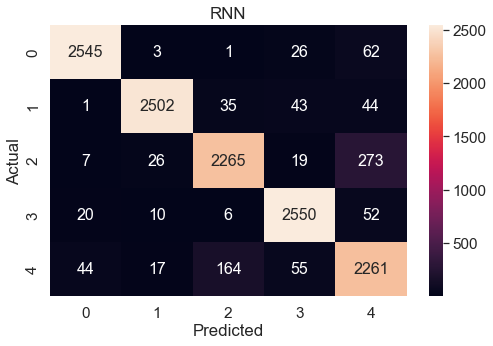

In [82]:
# Predict
y_predicted = model.predict(test_categorical['RNN_text'].to_numpy())
y_test = test_categorical['label'].to_numpy()

# Convert to labels
pred_class = [np.argmax(pred) for pred in y_predicted]

# Run metrics
tmp = []
tmp.append([str('RNN')] + calculate_categorical_metrics(y_test, pred_class))
draw_confusion_matrix(y_test, pred_class, CYBERBULLYING_CATEGORIES_NUM, str('RNN'), False)

categorical_score_df = pd.concat([categorical_score_df, pd.DataFrame(tmp, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])])
print("non augmented score")
print(categorical_score_df.to_markdown())
print("augmented score")
print(categorical_aug_score_df.to_markdown())
plt.show()

We were surprised by the non-augmented RNN result vs its augmented counterpart, in contrast to hte other models. We are not quite sure why there is a difference. We think it might be an anomaly that would be eliminated with cross validation. 

# Conclusions

In our project we presented a subject that we think is important to address - cyberbullying. We collected and examined the relevant data, and encountered difficulties that came with those datasets.  
Mainly, we didn't believe these datasets were good enough on their own and we encountered issues while combining them.
After further research and consulting, we came to a solution to these difficulties by separating our goal to detect cyberbullying online and detect the background for the cyberbullying, into 2 parts: first detecting if a statement is even considered as cyberbullying or not, secondly, when a statement is known as cyberbullying, trying to detect what subtype it is.

## Part 1 - Binary classification:

While implementing the first part, we selectively combined different datasets in order to create a more balanced dataset for training the binary cyberbullying classifier. 
We tested different types of classifiers for this task and comparing the results in order to identify which one is better for our needs.

__results:__
* __GradientBoosting__ - one of the best performing "simple" model in terms of fscore. Its disadvantage is that it took comparatively long to train  at around ~18 minutes. 
* __HistGradientBoosting__ - the variant was better in most metrics (including run time) from the base model. It performed the best from the simple models (accuracy and fbeta). It was also quicker at 70 seconds.
* __MultinominalNB__ - its run time was the quickest at less than a second, but the model performed relatively poorly in the fbeta metric.
* __RandomForest__ - one of the relatively poorest performing models. Its run time was also quite long at ~10 min
* __LogisticRegression__ - the warning from the fit function showed it did not converge, so the model can probably be improved with more iterations. Its run time was quick at ~20 seconds. It was third in fbeta score and second in accuracy.
* __RNN cross entropy loss__ - with training time of ~40 min. Its fbeta score and accuracy was the best reached this far, proving to us that a context based model is superior.
* __RNN fbeta loss__ - with training time of ~1 hour. The model was specifically trained to maximize fbeta score using its loss function. It succeeded in having the best fbeta score, while having one of the best accuracies. 

We wanted to note that the accuracy and fbeta did not drop below 88% and 84% respectively in any model.  
The best model we found was RNN based on fbeta loss.

## Part 2 - Categorical Cyberbullying Classification

While implementing the second part we noted that there was only one dataset matching our criteria, and while balanced, the categorical dataset is fairly small. In exploring the options we had to dealing with this problem, we decided that the best way is to try and enlarge the training dataset with data augmentation techniques. Specifically, using synonyms, spelling errors, and typing mistakes.  
We trained and tested our models with the original training data and the augmented one.

__results:__
* __HistGradientBoosting__ - It performed best using the unaugmented training set, and had the best performing accuracy overall from the unaugmented training set.
* __MultinominalNB__ - one of the relatively worst performing models in either training cases.
* __RandomForest__ - performed better with the unaugmented training set, and had the second best performing accuracy overall from the unaugmented training set, but third if we consider the augumented trained models.
* __LogisticRegression__ - performed better with the unaugmented training set, but was relatively one of the worst performing models.
* __RNN__ - the only model that performed better with the augmented training set. Its accuracy was around the accuracy of HistGradientBoosting when trained on the non augmented data.


We wanted to note that the accuracy did not drop below 83% in any model in any scenario.  
The best model we found was the HistGradientBoosting with non augmented data. We think that with further improvement of the RNN model, it can match or surpass the results of the HistGradientBoosting.

We were not able to conclude on a reason for the poor performance of the augmented training set on the simple models, and why the RNN performed differently.

On a personal note, we were disappointed we couldn't achieve a score higher than 95% (in accuracy or fbeta) in either of our models and parts.

## Thoughts of improvement

* After building and testing the models for each part, we can now integrate them to one working application to achieve out initial goals.
* The world of neural network is vast, and we only scratched the surface in this project. We believe that further improvements can be achieved using more fine tuning for our networks, or using different architectures (like dropout or BERT).
* The 'simple' models, also have more parameters that can be fine tuned to improve our models (like number of trees is random forest, or number of iterations in the logistical model)
* We could have explored more options for data augmentations and techniques for dealing with small datasets.
* There are many more techniques to preprocess the text. Some are relevant only to specific models and input. We believe that with more fine tuning of these techniques can improve our results further.
* In our project we used word based processing. Another option is to use n-grams for some of the models.

## Hardware

One of the challenges we encountered in this project is the limitation of our private computers. It was reflected in the high run time of our code, and limited our testing capabilities. In future projects, we will attempt to find an alternative remote platform to run some of our testing. 

## Self Reflection:


* One of our project goals was to find a subject that we felt is meaningful. We are happy to say that the classification of cyberbullying is one such subject. This helped motivate us to do better and explore the subject more deeply (including other researches in the field).

* In the project, we tackled different issues in the field of data processing (preprocessing, EDA, models and more). We were challenged by these, and feel that we learned a lot in the process. We are happy for what we learned along the way, and are excited to learn more in the field of data science in the future.

* At first, we were a little bit overwhelmed by the scope of the project. After some deliberation (and help from our lecturer), we tried to split the problem into two parts (as we mentioned in the project). We discovered that this method, of splitting the problem to smaller parts, was useful to manage the writing of the rest of the notebook. for example: splitting the classification to preprocessing stages and model stages.

* We have found that working with a partner was enjoyable and helpful. Having another person to discuss with and work on this project helped expose us to different opinions, and reach better decisions faster.